UPLOADING THE DATASET

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from textblob import TextBlob
data = pd.read_csv("Tweets.csv")
print(data)

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \

PRINTING THE HEADER DATA'S

In [29]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


PRINTING THE BOTTOM DATA'S

In [30]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


PRINTING THE INFO

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

SENTIMENTAL ANALYSIS FOR HEADER

In [32]:
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"
data['sentiment'] = data['text'].apply(analyze_sentiment)
print(data[['text', 'sentiment']].head())

                                                text sentiment
0                @VirginAmerica What @dhepburn said.   neutral
1  @VirginAmerica plus you've added commercials t...   neutral
2  @VirginAmerica I didn't today... Must mean I n...  negative
3  @VirginAmerica it's really aggressive to blast...  positive
4  @VirginAmerica and it's a really big bad thing...  negative


SENTIMENTAL ANALYSIS FOR BOTTOM 

In [6]:
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"
data['sentiment'] = data['text'].apply(analyze_sentiment)
print(data[['text', 'sentiment']].tail())


                                                    text sentiment
14635  @AmericanAir thank you we got on a different f...   neutral
14636  @AmericanAir leaving over 20 minutes Late Flig...  negative
14637  @AmericanAir Please bring American Airlines to...   neutral
14638  @AmericanAir you have my money, you change my ...  negative
14639  @AmericanAir we have 8 ppl so we need 2 know h...  positive


                   EXPLORATORY DATA ANALYSIS

HISTOGRAPH

array([[<Axes: title={'center': 'tweet_id'}>,
        <Axes: title={'center': 'airline_sentiment_confidence'}>],
       [<Axes: title={'center': 'negativereason_confidence'}>,
        <Axes: title={'center': 'retweet_count'}>]], dtype=object)

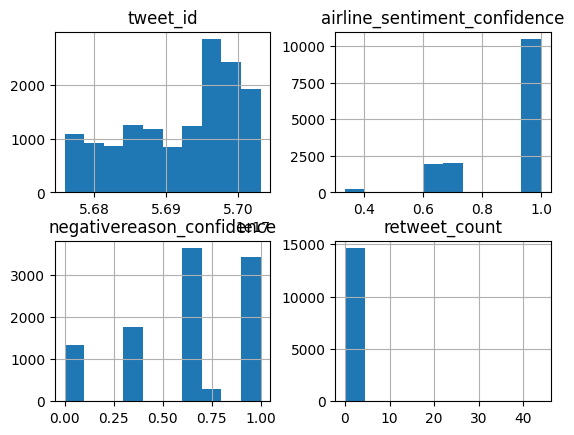

In [33]:
data.hist()

PLOTING

<Axes: >

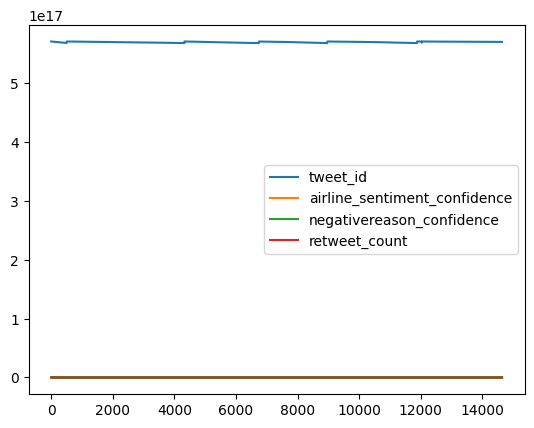

In [34]:
data.plot()

In [35]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
sentiment                           0
dtype: int64

SCATTER PLOT

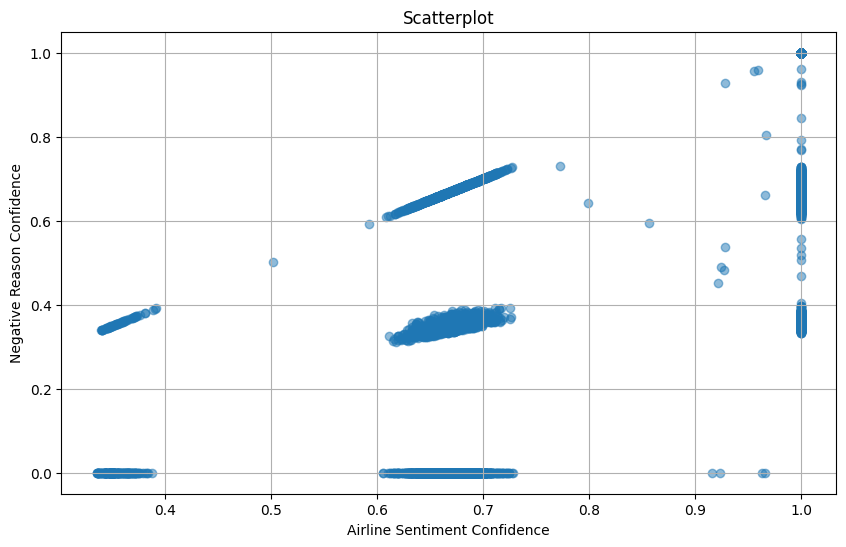

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(data['airline_sentiment_confidence'], data['negativereason_confidence'], alpha=0.5)
plt.xlabel('Airline Sentiment Confidence')
plt.ylabel('Negative Reason Confidence')
plt.title('Scatterplot')
plt.grid(True)
plt.show()

PIE CHART

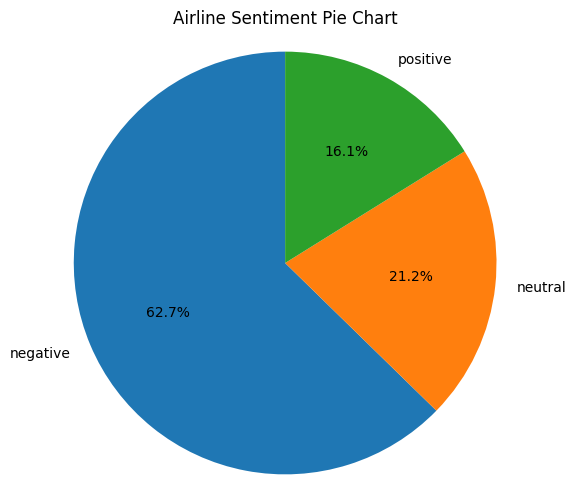

In [37]:
sentiment_counts = data['airline_sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Airline Sentiment Pie Chart')
plt.axis('equal')
plt.show()

BAR GRAPH

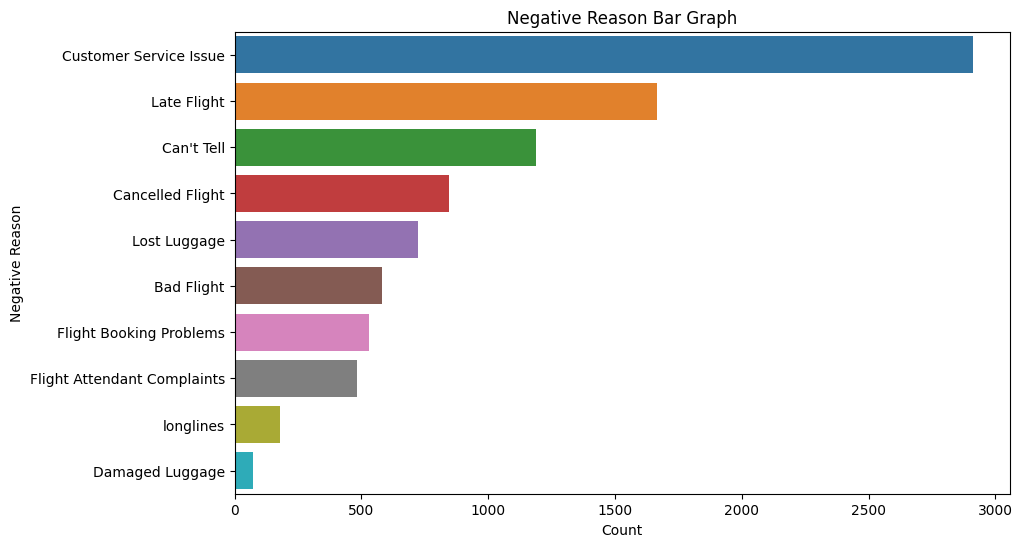

In [38]:
negative_reason_counts = data['negativereason'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_reason_counts.values, y=negative_reason_counts.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.title('Negative Reason Bar Graph')
plt.show()

DISTRIBUTION PLOT

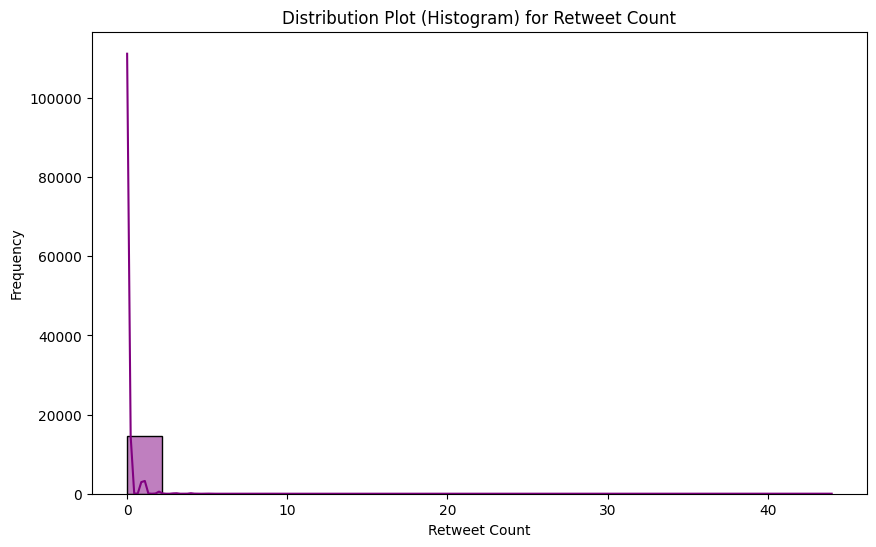

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data['retweet_count'], bins=20, kde=True, color='purple')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('Distribution Plot (Histogram) for Retweet Count')
plt.show()